C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "
C:\Users\tsuchida\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


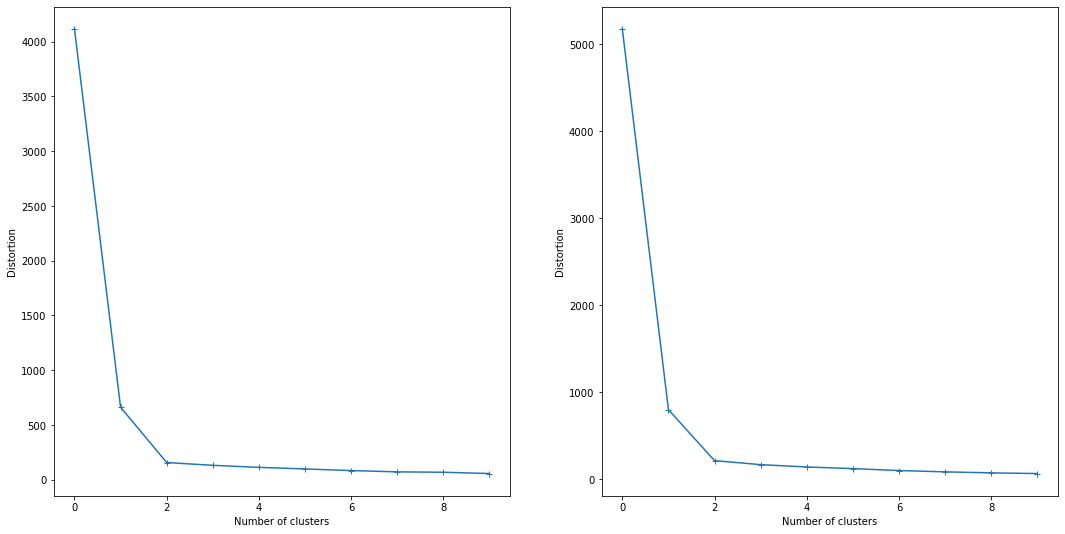

In [68]:
#AI-TECHGYM-1-3-Q-1
#教師なし学習 k-mean法

#1-3
#□データセットを生成して、散布図を書こう(描画するドットは黒色にする)

# 可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#分類データセット生成
from sklearn.datasets import make_blobs

#実行フォルダ
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

plt.figure(figsize = (18,9))

X, y = make_blobs(random_state=1)
inertia_set1 = []
for i in range(10):
  kmeans = KMeans(n_clusters=i+1, init='random')
  kmeans.fit(X)
  inertia_set1.append(kmeans.inertia_)

plt.subplot(1,2,1)
plt.plot(inertia_set1,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# X, y = make_blobs(random_state=5)
# plt.subplot(3,3,2)
# plt.scatter(X[:,0], X[:,1], color='black')

# X, y = make_blobs(random_state=10)
# plt.subplot(3,3,3)
# plt.scatter(X[:,0], X[:,1], color='black')

# X, y = make_blobs(random_state=15)
# plt.subplot(3,3,4)
# plt.scatter(X[:,0], X[:,1], color='black')

X, y = make_blobs(random_state=20)
inertia_set2 = []
for i in range(10):
  kmeans = KMeans(n_clusters=i+1, init='random')
  kmeans.fit(X)
  inertia_set2.append(kmeans.inertia_)

plt.subplot(1,2,2)
plt.plot(inertia_set2,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# X, y = make_blobs(random_state=25)
# plt.subplot(3,3,6)
# plt.scatter(X[:,0], X[:,1], color='black')

plt.show()

In [54]:
data_set[0][:,0]

array([-6.46397683, -4.84719576, -5.11988994,  0.23592899, -6.71208551,
       -5.94476825, -7.64676819, -5.89647284, -5.91896553, -6.13764981,
       -5.37253335, -5.55684774, -6.23402642, -4.14673856, -6.27460923,
       -1.22737252, -0.84229262,  0.26784182, -5.07319428, -0.02123377,
       -5.04948453, -1.29680884,  0.2667474 , -6.87090971, -5.56633149,
       -5.45052674, -4.56369675, -4.76708326, -8.20123871, -7.07131614,
       -7.0303188 , -4.90351711, -5.45939839, -5.61244473, -0.74203228,
       -6.31104688, -0.2911282 , -5.40795882, -0.37490264, -6.6263772 ,
        2.00149459, -5.80084772, -4.99200386,  0.72448563, -5.8659896 ,
        1.50667259, -4.40874557, -7.22492511,  0.60416773, -0.32560867,
       -4.04425215, -0.53278135, -7.55929193,  0.24456995, -5.36728768,
       -6.43201576,  0.07382395, -1.27027146,  0.99039433, -5.36247649,
       -1.12119696, -5.9958405 ,  0.01804109, -4.99296227, -4.72410916,
       -0.79882739, -3.77710221, -6.57608334, -7.61935775,  1.21

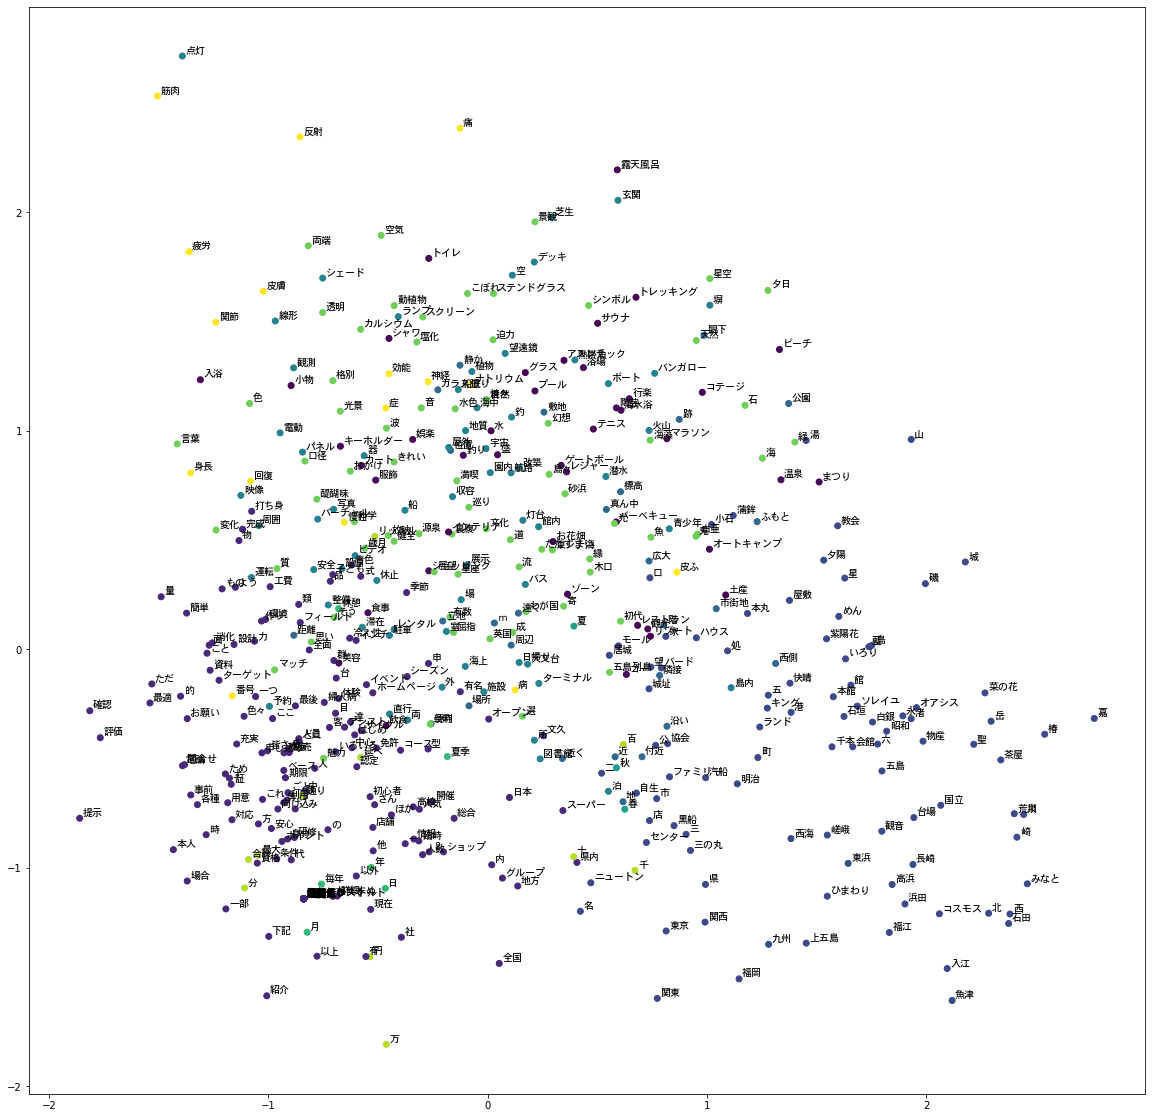

In [40]:
#AI-TECHGYM-1-14-A-2
#自然言語処理

#インポート
import numpy as np
import pandas as pd

#主成分分析
from sklearn.decomposition import PCA

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

#グラフ
from matplotlib import pylab as plt
import matplotlib.font_manager as font_manager

# word2vec データ読み込み
from gensim.models import KeyedVectors

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォント指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#グラフサイズ
plt.figure(figsize=(20,20))

# ダウンロード先のパスを指定
MODEL_FILENAME = "./stanby-jobs-200d-word2vector.bin"
w2v = KeyedVectors.load_word2vec_format(MODEL_FILENAME, binary=True)

# データの読み込み
df = pd.read_csv("words.csv") 

#ベクトルの取得
vectors = []
zero_vec = np.zeros(200)

for w in df["words"].values:
    try:
        vectors.append(w2v[w])
    except Exception as e:
        vectors.append(zero_vec)

#PCA
pca = PCA(n_components=2)
V = pca.fit_transform(vectors)
df_V = pd.DataFrame(V)

# クラスタリング
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit(vectors)
df_V['cluster'] = pd.Series(clusters.labels_, index=df_V.index)

#色指定
color = df_V.cluster.astype(float)

#ベクトルを平面にプロット
plt.scatter(V[:, 0], V[:,1],c=color)

#文字のプロット
for w, x, y in zip(df["words"].values, V[:,0], V[:,1]):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=10)

#グラフ表示
plt.show()


In [43]:
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

""


In [12]:
#アヤメデータを読み込むためのインポート
from sklearn.datasets import load_iris

#アヤメデータの取得
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
